Train SVM, Random Forest Classifier, Logistic Regresion, and Easy Ensemble Classifier ML Models and Compare Confusion Matrixes

In [37]:
#Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Read and Load Data

<div style="font-size:85%">
  
1. Read the CSV file 'ML_features.csv' into a DataFrame.  
2. Separate features into x by dropping the 'label' column.  
3. Assign the 'label' column to y.  

</div>

In [38]:
df = pd.read_csv("ML_features.csv")
x = df.drop(columns=["label"])
y = df["label"]

Split the Data into Training and Testing Sets and Standardize

<div style="font-size:85%">
  
1. Split x and y into training and testing sets with 80/20 ratio, stratified by y.  
2. Initialize StandardScaler.  
3. Fit scaler on training data and transform both training and testing features.  

</div>

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Define SVM Model Training Function

<div style="font-size:85%">
  
1. Define a function to train SVM with RBF kernel.  
2. Fit the model on scaled training data.  
3. Calculate training and testing accuracy.  
4. Return the model and accuracies.  

</div>

In [ ]:
def train_svm(x_train_scaled, y_train, x_test_scaled, y_test):
    svm = SVC(kernel="rbf", random_state=42)
    svm.fit(x_train_scaled, y_train)
    train_acc = accuracy_score(y_train, svm.predict(x_train_scaled))
    test_acc = accuracy_score(y_test, svm.predict(x_test_scaled))
    return svm, train_acc, test_acc

Define Random Forest Model Training Function

<div style="font-size:85%">
  
1. Define a function to train Random Forest with 200 estimators.  
2. Fit the model on training data.  
3. Calculate training and testing accuracy.  
4. Return the model and accuracies.  

</div>

In [ ]:
def train_rf(x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=42)
    rf.fit(x_train, y_train)
    train_acc = accuracy_score(y_train, rf.predict(x_train))
    test_acc = accuracy_score(y_test, rf.predict(x_test))
    return rf, train_acc, test_acc

Define Logistic Regression Model Training Function

<div style="font-size:85%">
  
1. Define a function to train Logistic Regression with max_iter=500.  
2. Fit the model on scaled training data.  
3. Calculate training and testing accuracy.  
4. Return the model and accuracies.  

</div>

In [ ]:
def train_lr(x_train_scaled, y_train, x_test_scaled, y_test):
    lr = LogisticRegression(max_iter=500, random_state=42)
    lr.fit(x_train_scaled, y_train)
    train_acc = accuracy_score(y_train, lr.predict(x_train_scaled))
    test_acc = accuracy_score(y_test, lr.predict(x_test_scaled))
    return lr, train_acc, test_acc

Define Easy Ensemble Model Training Function

<div style="font-size:85%">
  
1. Define a function to train Easy Ensemble Classifier.  
2. Fit the model on training data.  
3. Calculate training and testing accuracy.  
4. Return the model and accuracies.  

</div>

In [ ]:
def train_ee(x_train, y_train, x_test, y_test):
    ee = EasyEnsembleClassifier(random_state=42)
    ee.fit(x_train, y_train)
    train_acc = accuracy_score(y_train, ee.predict(x_train))
    test_acc = accuracy_score(y_test, ee.predict(x_test))
    return ee, train_acc, test_acc

Train All Models

In [ ]:
svm, svm_train_acc, svm_test_acc = train_svm(x_train_scaled, y_train, x_test_scaled, y_test)
rf, rf_train_acc, rf_test_acc = train_rf(x_train, y_train, x_test, y_test)
lr, lr_train_acc, lr_test_acc = train_lr(x_train_scaled, y_train, x_test_scaled, y_test)
ee, ee_train_acc, ee_test_acc = train_ee(x_train, y_train, x_test, y_test)


Accuracy Comparison between Four Models

<div style="font-size:85%">
  
1. Create a DataFrame with model names and their training/testing accuracies.  
2. Print the results.  

</div>

In [ ]:
results = pd.DataFrame({
    "Model": ["SVM", "Random Forest", "Logistic Regression", "Easy Ensemble"],
    "Training Accuracy": [svm_train_acc, rf_train_acc, lr_train_acc, ee_train_acc],
    "Testing Accuracy": [svm_test_acc, rf_test_acc, lr_test_acc, ee_test_acc]
})

print(results)

                 Model  Training Accuracy  Testing Accuracy
0                  SVM           0.941667          0.966667
1        Random Forest           1.000000          0.983333
2  Logistic Regression           0.775000          0.833333
3        Easy Ensemble           0.987500          0.950000


Confusion Matrix and Metrics Calculations

Define Function for Calculating Confusion Matrix and Metrics Scores

In [45]:
def evaluate_model(model, x_test, y_test):
    pred = model.predict(x_test)
    cm = confusion_matrix(y_test, pred)

    TP, FP = cm[0][0], cm[0][1]
    TN, FN = cm[1][0], cm[1][1]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * (precision * recall) / (precision + recall)

    return cm, accuracy, precision, recall, f1

Calculate All Scores for ML Models

<div style="font-size:85%">
  
1. Create a dictionary of models and their test data.  
2. Initialize dictionaries for metrics and confusion matrices.  
3. Loop over each model to evaluate and store results.  

</div>

In [ ]:
models = {
    "SVM": (svm, x_test_scaled),
    "Random Forest": (rf, x_test),
    "Logistic Regression": (lr, x_test_scaled),
    "Easy Ensemble": (ee, x_test)
}

results_metrics = {}
confusion_matrices = {}

for model_name, (model, x_data) in models.items():
    cm, accuracy, precision, recall, f1 = evaluate_model(model, x_data, y_test)
    results_metrics[model_name] = [accuracy, precision, recall, f1]
    confusion_matrices[model_name] = cm

Show Metrics as a Data Table

<div style="font-size:85%">
  
1. Create a DataFrame from results_metrics with metrics as rows.  
2. Print the DataFrame.  

</div>

In [ ]:
df_metrics = pd.DataFrame(results_metrics, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T
print(df_metrics)

                     Accuracy  Precision    Recall  F1 Score
SVM                  0.466667   0.933333  0.482759  0.636364
Random Forest        0.516667   1.000000  0.508475  0.674157
Logistic Regression  0.466667   0.800000  0.480000  0.600000
Easy Ensemble        0.516667   0.966667  0.508772  0.666667


Define Function for Displaying Confusion Matrix

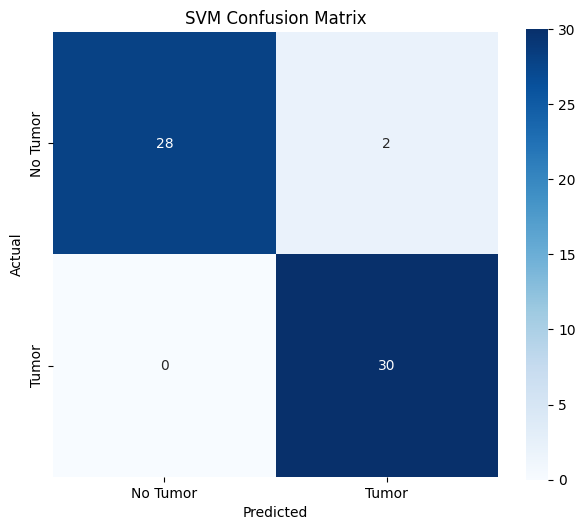

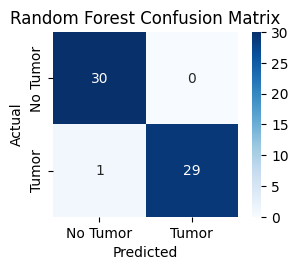

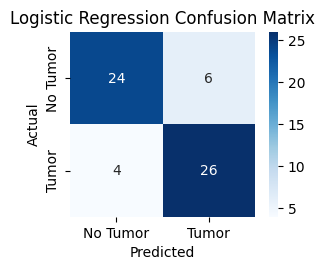

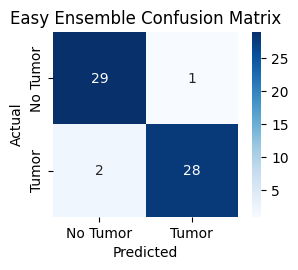

In [ ]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, annot=True, cmap='Blues', square=True, 
        xticklabels=["No Tumor", "Tumor"], 
        yticklabels=["No Tumor", "Tumor"]
    )
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
        

Plot Confusion Matrices for All Models

In [ ]:
for model_name, cm in confusion_matrices.items():
    plot_confusion_matrix(cm, model_name)